In [1]:
# import essential packages 

import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
# import load datasets 

Rad15=pd.read_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\NIH_FY15_RadGrant.csv')
Rad15

,Project Title,Administering IC,Application ID,Project Number,Type,Activity,IC,Serial Number,Support Year,Suffix,Contact PI Person ID,Contact PI / Project Leader,Organization Name,FY Total Cost
0,QUANTITATIVE MRI FOR PREDICTING RESPONSE OF BR...,NCI,8887540,2U01CA142565-06,2,U01,CA,142565,6,NaN,11184125,"ABRAMSON, RICHARD G",VANDERBILT UNIVERSITY,169657.0
1,WU-MDACC INTER-INSTITUTIONAL MOLECULAR IMAGING...,NCI,8820886,5P50CA094056-15,5,P50,CA,94056,15,NaN,7034760,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,1428925.0
2,NANOPHOTOSENSITIZERS FOR REGENERATIVE PHOTOTHE...,NIBIB,8977000,1R01EB021048-01,1,R01,EB,21048,1,NaN,7034760,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,474615.0
3,CENTER FOR MULTIPLE MYELOMA NANOTHERAPY,NCI,8962044,1U54CA199092-01,1,U54,CA,199092,1,NaN,7034760,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,2256089.0
4,DEVELOPMENT OF GOGGLE SYSTEM FOR FLUORESCENCE ...,NCI,8787992,5R01CA171651-03,5,R01,CA,171651,3,NaN,7034760,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,603662.0
5,FLUORESCENCE MOLECULAR TOMOGRAPHY SYSTEM,OD,8826437,1S10OD020129-01,1,S10,OD,20129,1,NaN,7034760,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,330122.0
6,MULTI-RESOLUTION THREE DIMENSIONAL STEREOTAXIC...,NIBIB,8866401,5R03EB017806-02,5,R03,EB,17806,2,NaN,11268254,"AGGARWAL, MANISHA",JOHNS HOPKINS UNIVERSITY,81000.0
7,INTRACELLULAR OXYGEN SENSING USING 19F MRI,NIBIB,8919703,5R01EB017271-03,5,R01,EB,17271,3,NaN,1970914,"AHRENS, ERIC T",UNIVERSITY OF CALIFORNIA SAN DIEGO,330035.0
8,IEEE MEDICAL IMAGING CONFERENCE,NIBIB,8910150,1R13EB020487-01,1,R13,EB,20487,1,NaN,8540275,"ALESSIO, ADAM M",UNIVERSITY OF WASHINGTON,10000.0
9,LOW-DOSE MYOCARDIAL PERFUSION IMAGING BY CT,NHLBI,8837053,5R01HL109327-04,5,R01,HL,109327,4,NaN,8540275,"ALESSIO, ADAM M",UNIVERSITY OF WASHINGTON,408661.0


In [103]:
import urllib
import mechanize
import regex as rex
from bs4 import BeautifulSoup
import time
# handle robots
br=mechanize.Browser()
br.set_handle_robots(False)
br.addheaders=[('User-agent','chrome')]


PI_lst=Rad15['Contact PI / Project Leader']
Uni_lst=Rad15['Organization Name']

#rank_df=pd.DataFrame()
dpt_of=[]
for PI, Uni in zip(PI_lst,Uni_lst):
    term = str(PI+Uni).replace(" ","+")
    query= "https://www.google.com/search?q="+term
    htmltext= br.open(query).read()

#print htmltext

    soup=BeautifulSoup(htmltext,"lxml")

    search_result=soup.find_all('div', {'id':'search'})

    sr_retxt=search_result[0].text
    #regex="Department of (.*?),.*?"
    regex= "Department of (.*?)(?=[(\|)-,.]|(-\n)|\n)|Professor of (.*?)(?=[(\|)-,.:\/(\n)]|(?=at|and))" #Department of (.*?)[(\|)-,.]|Professor of (.*?)([(:\|)-,.])|(-(at|and))"
    

    pattern=rex.compile(regex,rex.IGNORECASE)
    #pattern-re.search(regex)
    #Department of (.*?)([(\|)-,.])|Professor of (.*?)(?=[(\|)-,.:\/]|(?=at|and))
    dpt_of.append(rex.findall(pattern,sr_retxt)) #next(s for s in dpt_of[i][0] if s)
    #re.search(pattern,sr_retxt).group()
    time.sleep(20)
    
    
dlst=[]    
rank_df1=[]
for PI, Uni,i in zip(PI_lst,Uni_lst,range(len(dpt_of))):
        rank_row=[]
        rank_row.append(PI)
        rank_row.append(Uni)
        
        #dlst.append(s for s in dpt_of[i][0] if s)
        
        if len(dpt_of[i])!=0:
            dlst.append([s for s in dpt_of[i] if s])
            #rank_row.append(dlst[0][0])
            rank_row.append(next(s for s in dlst[0][0] if s))
            #rank_row.append(next(s for s in dpt_of[i][0] if s))
        else: 
            rank_row.append(np.nan)
        
        
        rank_df1.append(rank_row)
rank_df=pd.DataFrame(rank_df1,columns=['PI','Organization','Department'])
rank_df.to_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_PI_uni_dpt.csv',encoding='utf-8', index=False)
rank_df


#cpy_Rad15_7_15=cpy_Rad15.loc[8:15,]
#cpy_Rad15_7_15['dpt']=cpy_dpt
#cpy_Rad15_7_15
# regex="Department of [A-Z]*(?=\,)"   #java\s?[^A-Z]*(?=\.[A-Z])
# re.findall

#while i<len()

#print soup


,PI,Organization,Department
0,"ABRAMSON, RICHARD G",VANDERBILT UNIVERSITY,Radiology
1,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,Radiology
2,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,Radiology
3,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,Radiology
4,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,Radiology
5,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,Radiology
6,"AGGARWAL, MANISHA",JOHNS HOPKINS UNIVERSITY,NaN
7,"AHRENS, ERIC T",UNIVERSITY OF CALIFORNIA SAN DIEGO,Radiology
8,"ALESSIO, ADAM M",UNIVERSITY OF WASHINGTON,Radiology
9,"ALESSIO, ADAM M",UNIVERSITY OF WASHINGTON,Radiology


In [57]:
dlst=[]    
rank_df1=[]
for PI, Uni,i in zip(PI_lst,Uni_lst,range(len(dpt_of))):
        rank_row=[]
        rank_row.append(PI)
        rank_row.append(Uni)
        
        dlst.append([s for s in dpt_of[i] if s])
        
       
        if len(dlst[s])!=0:
                rank_row.append(dlst[s])
            else: 
                rank_row.append(np.nan)
        
        
        rank_df1.append(rank_row)
rank_df=pd.DataFrame(rank_df1,columns=['PI','Organization','Department'])
#rank_df.to_csv('E:\\nycds\\webscraping project\\rank15_PI_uni_dpt.csv',encoding='utf-8', index=False)
rank_df

IndentationError: unindent does not match any outer indentation level (<ipython-input-57-d968d714cd04>, line 13)

In [120]:
len(dlst)

782

In [129]:
len([s for s in dpt_of if s])

782

In [128]:
len(dpt_of)

876

In [145]:
#list(set(dpt_of) - set(dlst))
s=set(dlst)
[a for a in dpt_of if a not in s]

TypeError: unhashable type: 'list'

In [169]:
#[s for s in dpt_of if s]


    
rank_df2=[]
for PI, Uni,i in zip(PI_lst,Uni_lst,range(len(dpt_of))):
        rank_newrow=[]
        rank_newrow.append(PI)
        rank_newrow.append(Uni)
    
        try: 
            if len(dpt_of[i])!=0:
                rank_newrow.append(next(s for s in dpt_of[i][0] if s))
            
        except: 
            rank_newrow.append(np.nan)
        
        
        rank_df2.append(rank_newrow)
rank_newdf=pd.DataFrame(rank_df2,columns=['PI','Organization','Department'])
rank_newdf.to_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_PI_uni_dpt_new.csv',encoding='utf-8', index=False)
rank_newdf






,PI,Organization,Department
0,"ABRAMSON, RICHARD G",VANDERBILT UNIVERSITY,Radiology
1,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,Radiology
2,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,Radiology
3,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,Radiology
4,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,Radiology
5,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,Radiology
6,"AGGARWAL, MANISHA",JOHNS HOPKINS UNIVERSITY,None
7,"AHRENS, ERIC T",UNIVERSITY OF CALIFORNIA SAN DIEGO,Radiologyradiology
8,"ALESSIO, ADAM M",UNIVERSITY OF WASHINGTON,Radiology
9,"ALESSIO, ADAM M",UNIVERSITY OF WASHINGTON,Radiology


In [164]:
for i in range(len(dpt_of)):
    try: 
            #if len(dpt_of[i])!=0:
                print [s for s in dpt_of[i][0] if s]
            
    except: 
            print np.nan

[u'Radiology ']
[u'Radiology']
[u'Radiology']
[u'Radiology']
[u'Radiology']
[u'Radiology']
nan
[u'Radiologyradiology']
[u'Radiology']
[u'Radiology']
[u'Radiology - ']
[u'Radiology - ']
[u'Biomedical Engineering Associ']
[u'Pharmacology ']
[u'Neuroradiology']
[u'Radiology - University of Chicagohttps://radiology']
[u'Radiology Specialties Research ']
[u'Radiology ']
nan
[u'Radi']
[u'Radi']
[u'Radiology']
[u'Radiology']
[u'Radiology 650 First Avenue']
[u'Radiology']
[u'Radiology; Associ']
[u'Radiological Science']
[u'Radiological Science']
[u'Radiologyradiology']
[u'Radiology']
[u'Pharmacology & Chemical ']
[u'Radiology ']
[u'Physics in Radiology ']
[u'Radiation Oncology']
[u'Radiology Associ']
[u'Radiology Associ']
[u'Cell Biologywww']
[u'Radiation Oncology']
[]
[]
[u'Medical Imaging']
[u'mechanical engineering ']
[u'Radiology > People > James P']
[u'Radiology']
[u'Radiation Physics']
[u'Radi']
[u'Anthropology Staffanthropology']
[u'Radiology ']
[u'Radiology']
[u'Radiology ']
nan
[u'Can

In [148]:
for i in range(len(dpt_of)):
    try: 
        if len(dpt_of[i])!=0:
            print next(s for s in dpt_of[i][0] if s)
        else: 
            print "none"
    except:
        print np.nan

Radiology 
Radiology
Radiology
Radiology
Radiology
Radiology
none
Radiologyradiology
Radiology
Radiology
Radiology - 
Radiology - 
Biomedical Engineering Associ
Pharmacology 
Neuroradiology
Radiology - University of Chicagohttps://radiology
Radiology Specialties Research 
Radiology 
none
Radi
Radi
Radiology
Radiology
Radiology 650 First Avenue
Radiology
Radiology; Associ
Radiological Science
Radiological Science
Radiologyradiology
Radiology
Pharmacology & Chemical 
Radiology 
Physics in Radiology 
Radiation Oncology
Radiology Associ
Radiology Associ
Cell Biologywww
Radiation Oncology
nan
nan
Medical Imaging
mechanical engineering 
Radiology > People > James P
Radiology
Radiation Physics
Radi
Anthropology Staffanthropology
Radiology 
Radiology
Radiology 
none
Cancer Systems Imaging - Faculty 
Radiology 
Radiology 
Radiology 
Psychology at the University of Houston
Therapeutic Radiology at Yale University School of Medicine - Yale University School of MedicineView Ranjit Bindra's profess

In [97]:
dpt_of==dlst
len(dpt_of)
dpt_of[-1]

[(u'', u'', u'Radiology '),
 (u'', u'', u"Interventional Radiology - St George's Hospital "),
 (u'', u'', u'Radiology - University of Pittsburgh\xa0')]

In [16]:
dlst

[]

In [75]:
rank_df1=[]
for PI, Uni,i in zip(PI_lst,Uni_lst,range(len(dpt_of[i]))):
        rank_row=[]
        rank_row.append(PI)
        rank_row.append(Uni)
        dlst=[s for s in dpt_of[i] if s]
        try:
            rank_row.append(dlst[0])
        except:
            rank_row.append(np.nan)
        
        
        rank_df1.append(rank_row)
rank_df=pd.DataFrame(rank_df1,columns=['PI','Organization','Department'])
#rank_df.to_csv('E:\\nycds\\webscraping project\\rank15_PI_uni_dpt.csv',encoding='utf-8', index=False)
rank_df

,PI,Organization,Department
0,"ABRAMSON, RICHARD G",VANDERBILT UNIVERSITY,"(, Radiology, and)"
1,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,"(, Radiology, Biomedical Engineering, Biochemi..."


In [57]:
#len(cpy_dpt),len(cpy_Rad15_7_15)
len(dpt_of)
dpt_of[7][0][0]

u'Radiologyradiology'

In [50]:
for dpt in dpt_of:
    if dpt:
        print dpt
        
    else: 
        print "empity"

empity
empity
empity
empity
empity
empity
empity
[(u'Radiologyradiology', u''), (u'', u'Radiology'), (u'', u'Radiology')]
[(u'Radiology', u'')]
[(u'Radiology', u'')]


In [62]:
rank_df1=[]
for PI, Uni,i in zip(PI_lst,Uni_lst,range(len(dpt_of))):
        rank_row=[]
        rank_row.append(PI)
        rank_row.append(Uni)
        
        dlst=[s for s in dpt_of[i] if s]
        try:
            rank_row.append(dlst[0])
           
            
        except: 
            #cpy_dpt.append(np.nan)
            rank_row.append(np.nan)
        #else:
            #rank_row.append(dpt_of[i])
        rank_df1.append(rank_row)
rank_df=pd.DataFrame(rank_df1,columns=['PI','Organization','Department'])
rank_df
    

,PI,Organization,Department
0,"ABRAMSON, RICHARD G",VANDERBILT UNIVERSITY,Radiology
1,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,Radiology


In [30]:
rank_df1

[['ABRAMSON, RICHARD G ', 'VANDERBILT UNIVERSITY', nan, u'R', u'a'],
 ['ACHILEFU, SAMUEL  ', 'WASHINGTON UNIVERSITY', nan, u'R', u'a']]

In [24]:
len(dpt_of)

2

In [94]:
import regex as rex
import urllib
import mechanize
from bs4 import BeautifulSoup

# handle robots
br=mechanize.Browser()
br.set_handle_robots(False)
br.addheaders=[('User-agent','chrome')]

term = "BERG, WENDIE A UNIVERSITY OF PITTSBURGH AT PITTSBURGH".replace(" ","+")
query= "https://www.google.com/search?q="+term
htmltext= br.open(query).read()

#print htmltext

soup=BeautifulSoup(htmltext,"lxml")

search_result=soup.find_all('div', {'id':'search'})



sr_retxt=search_result[0].text
#regex="Department of (.*?),.*?"
regex="Department of (.*?)(?=[(\|)-,.]|(-\n)|\n)|Professor of (.*?)(?=[(\|)-,.:\/(\n)]|(?=at|and))"

pattern=rex.compile(regex,rex.IGNORECASE)
#pattern-re.search(regex)
dpt_1=rex.findall(pattern,sr_retxt)
#re.search(pattern,sr_retxt).group()
print dpt_1
  
sr_retxt


[(u'', u'', u'Radiology ')]


u"Wendie Berg, MD, PhD - University of Pittsburgh Radiology - Faculty ...www.rad.pitt.edu/?faculty/faculty-detail.html?facID=311CachedSimilarWendie Berg, MD, PhD, FACR Professor E-Mail: Medical/Graduate School, \nJohns Hopkins University School of Medicine: MD, PhD '87. Residency, Johns\xa0...A radiologist confronts her own breast cancer - AuntMinnie.comwww.auntminnie.com/Redirect/Redirect.aspx?ItemId=110756SimilarApr 22, 2015 ... April 22, 2015 -- University of Pittsburgh radiologist Dr. Wendie Berg, PhD, was diagnosed with breast cancer in June 2014, after discovering that she has dense breast tissue and undergoing a breast MRI.\n In this article, Dr. Berg describes her personal experience and announces the ...Wendie Anderson Berg, MD, PhD - Find A Doctor, UPMC | University ...findadoc.upmc.com/PhysicianBioQuery.aspx?EPCDID=149864CachedSimilarLearn about UPMC medical expert Wendie Anderson Berg, MD, PhD, ... \nUniversity of Pittsburgh Physicians ... Johns Hopkins University School of

In [41]:
print re.search('Department of (.*?)([(\|)-,.])|Professor of (.*?)(?=[(\|)-,.:\/]|(?=at|and))',sr_retxt)

None


In [176]:
PI_uni_dpt=pd.read_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_PI_uni_dpt_new1.csv')
PI_uni_dpt

,PI,Organization,Department
0,"ABRAMSON, RICHARD G",VANDERBILT UNIVERSITY,Radiology
1,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,Radiology
2,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,Radiology
3,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,Radiology
4,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,Radiology
5,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,Radiology
6,"AGGARWAL, MANISHA",JOHNS HOPKINS UNIVERSITY,Radiology and Radiological Science
7,"AHRENS, ERIC T",UNIVERSITY OF CALIFORNIA SAN DIEGO,Radiologyradiology
8,"ALESSIO, ADAM M",UNIVERSITY OF WASHINGTON,Radiology
9,"ALESSIO, ADAM M",UNIVERSITY OF WASHINGTON,Radiology


In [177]:
PI_uni_dpt['Department']=PI_uni_dpt['Department'].str.upper()
PI_uni_dpt_upr=PI_uni_dpt
PI_uni_dpt_upr

,PI,Organization,Department
0,"ABRAMSON, RICHARD G",VANDERBILT UNIVERSITY,RADIOLOGY
1,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,RADIOLOGY
2,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,RADIOLOGY
3,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,RADIOLOGY
4,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,RADIOLOGY
5,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,RADIOLOGY
6,"AGGARWAL, MANISHA",JOHNS HOPKINS UNIVERSITY,RADIOLOGY AND RADIOLOGICAL SCIENCE
7,"AHRENS, ERIC T",UNIVERSITY OF CALIFORNIA SAN DIEGO,RADIOLOGYRADIOLOGY
8,"ALESSIO, ADAM M",UNIVERSITY OF WASHINGTON,RADIOLOGY
9,"ALESSIO, ADAM M",UNIVERSITY OF WASHINGTON,RADIOLOGY


In [133]:
PI_uni_dpt[PI_uni_dpt['Department'].str.contains('RADIOLOGY',na=False)].Department.str.split(r'RADIOLOGY(.*)')

0                                              [,  , ]
1                                               [, , ]
2                                               [, , ]
3                                               [, , ]
4                                               [, , ]
5                                               [, , ]
6                      [,  AND RADIOLOGICAL SCIENCE, ]
7                                      [, RADIOLOGY, ]
8                                               [, , ]
9                                               [, , ]
10                                           [,  - , ]
11                                           [,  - , ]
14                                         [NEURO, , ]
15     [,  - UNIVERSITY OF CHICAGOHTTPS://RADIOLOGY, ]
16                        [,  SPECIALTIES RESEARCH , ]
17                                             [,  , ]
18                                             [,  , ]
21                                              [, , ]
22        

In [150]:
import regex as rex 
for dpt in PI_uni_dpt['Department']:
    print rex.sub('RADIOLOGY(.*)','',str(dpt))













BIOMEDICAL ENGINEERING ASSOCI
PHARMACOLOGY 
NEURO




�RADIATION ONCOLOGY
�RADIATION ONCOLOGY





RADIOLOGICAL SCIENCE
RADIOLOGICAL SCIENCE


RADIATION ONCOLOGY


RADIATION ONCOLOGY


RADIATION ONCOLOGY
RADIATION ONCOLOGY


MEDICAL IMAGING
MECHANICAL ENGINEERING 


RADIATION PHYSICS
RADIATION ONCOLOGY
nan



RADIATION ONCOLOGY
CANCER SYSTEMS IMAGING - FACULTY 



PSYCHOLOGY AT THE UNIVERSITY OF HOUSTON
THERAPEUTIC 
RADIATION AND CELLULAR ONCOLOGY









PHYSIOLOGY AND PHARMACOLOGY
PHYSIOLOGY AND PHARMACOLOGY
RADIATION ONCOLOGY
RADIATION ONCOLOGY
PHARMACOLOGY AND CANCER BIOLOGY
RADIATION ONCOLOGY

RADIATION 
RADIATION ONCOLOGY - DONALD BUCHSBAUM PHDHTTPS://WWW








RADIATION ONCOLOGY
RADIATION ONCOLOGY
nan
RADIATION ONCOLOGY


RADIATION ONCOLOGY
PHYSICAL MEDICINE AND REHABILITATION


RADIATION ONCOLOGY

RADIATION ONCOLOGY
RADIATION ONCOLOGY
BIOCHEMISTRY AND MOLECULAR BIOLOGY



RADIATION ONCOLOGY AT THE UNIVERSITY OF TEXAS 



DIAGNOSTIC 
nan

RADIATION ONCOLOGY
RADIAT

In [197]:
#PI_uni_dpt['Department'].str.partition('RADIOLOGY').iloc[:,:2]
#PI_uni_dpt_upr

dpt_new=PI_uni_dpt['Department'].str.partition('RADIOLOGY').iloc[:,:2]
dpt_new=dpt_new.iloc[:,0]+dpt_new.iloc[:,1]
PI_uni_dpt['Department']=dpt_new
PI_uni_dpt

,PI,Organization,Department
0,"ABRAMSON, RICHARD G",VANDERBILT UNIVERSITY,RADIOLOGY
1,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,RADIOLOGY
2,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,RADIOLOGY
3,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,RADIOLOGY
4,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,RADIOLOGY
5,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,RADIOLOGY
6,"AGGARWAL, MANISHA",JOHNS HOPKINS UNIVERSITY,RADIOLOGY
7,"AHRENS, ERIC T",UNIVERSITY OF CALIFORNIA SAN DIEGO,RADIOLOGY
8,"ALESSIO, ADAM M",UNIVERSITY OF WASHINGTON,RADIOLOGY
9,"ALESSIO, ADAM M",UNIVERSITY OF WASHINGTON,RADIOLOGY


In [215]:
#PI_uni_dpt['FY total cost']=Rad15['FY Total Cost']
PI_uni_dpt 

,PI,Organization,Department,FY total cost
0,"ABRAMSON, RICHARD G",VANDERBILT UNIVERSITY,RADIOLOGY,169657.0
1,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,RADIOLOGY,1428925.0
2,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,RADIOLOGY,474615.0
3,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,RADIOLOGY,2256089.0
4,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,RADIOLOGY,603662.0
5,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,RADIOLOGY,330122.0
6,"AGGARWAL, MANISHA",JOHNS HOPKINS UNIVERSITY,RADIOLOGY,81000.0
7,"AHRENS, ERIC T",UNIVERSITY OF CALIFORNIA SAN DIEGO,RADIOLOGY,330035.0
8,"ALESSIO, ADAM M",UNIVERSITY OF WASHINGTON,RADIOLOGY,10000.0
9,"ALESSIO, ADAM M",UNIVERSITY OF WASHINGTON,RADIOLOGY,408661.0


In [360]:
Rad15['Department']=PI_uni_dpt['Department']

In [363]:
Rad15.to_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_dpt.csv',index=False)
Rad15.shape

(876, 15)

In [209]:
dpt_radonc=PI_uni_dpt['Department'].str.partition('RADIATION ONCOLOGY').iloc[:,:2]
PI_uni_dpt['Department']=dpt_radonc.iloc[:,0]+dpt_radonc.iloc[:,1]
PI_uni_dpt['Department']
PI_uni_dpt.to_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_PI_uni_dpt_cost.csv',index=False)

In [3]:
Rad15_dpt=pd.read_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_dpt.csv')

In [4]:
Rad15_dpt[Rad15_dpt['Organization Name']=='UNIVERSITY OF TX MD ANDERSON CAN CTR']

,Project Title,Administering IC,Application ID,Project Number,Type,Activity,IC,Serial Number,Support Year,Suffix,Contact PI Person ID,Contact PI / Project Leader,Organization Name,FY Total Cost,Department
44,REAL-TIME VOLUMETRIC SCINTILLATION DOSIMETRY F...,NCI,8895288,5R01CA182450-02,5,R01,CA,182450,2,NaN,8293922,"BEDDAR, SAM",UNIVERSITY OF TX MD ANDERSON CAN CTR,266875,RADIATION PHYSICS
51,(PQC5)EARLY DETECTION PANCREATIC CANCER BY HYP...,NCI,8841697,5R21CA185536-02,5,R21,CA,185536,2,NaN,11758537,"BHATTACHARYA, PRATIP K.",UNIVERSITY OF TX MD ANDERSON CAN CTR,174000,CANCER SYSTEMS IMAGING - FACULTY
111,STUDY THE ROLE OF DNA DAMAGE RESPONSES IN TUMO...,NCI,8838722,5R01CA092312-17,5,R01,CA,92312,17,NaN,1980054,"CHEN, JUNJIE",UNIVERSITY OF TX MD ANDERSON CAN CTR,236801,EXPERIMENTAL RADIATION ONCOLOGY
112,ANALYSIS OF BRCA1 FUNCTION IN DNA REPAIR,NCI,8838721,5R01CA089239-17,5,R01,CA,89239,17,NaN,1980054,"CHEN, JUNJIE",UNIVERSITY OF TX MD ANDERSON CAN CTR,251836,EXPERIMENTAL RADIATION ONCOLOGY
113,FANCONI ANEMIA PATHWAY IN DNA DAMAGE REPAIR,NCI,8826053,5R01CA157448-04,5,R01,CA,157448,4,NaN,1980054,"CHEN, JUNJIE",UNIVERSITY OF TX MD ANDERSON CAN CTR,327850,EXPERIMENTAL RADIATION ONCOLOGY
114,STUDY THE ROLE OF CHFR IN TUMORIGENESIS,NCI,8774203,5R01CA113381-11,5,R01,CA,113381,11,NaN,1980054,"CHEN, JUNJIE",UNIVERSITY OF TX MD ANDERSON CAN CTR,272318,EXPERIMENTAL RADIATION ONCOLOGY
163,ELUCIDATE THE ROLE OF MIR-141 IN BRAIN METASTA...,NCI,8887321,5R21CA188672-02,5,R21,CA,188672,2,NaN,9807091,"DEBEB, BISRAT G",UNIVERSITY OF TX MD ANDERSON CAN CTR,174000,RADIATION
234,MECHANISTIC STUDIES OF CANCER CELL ADAPTIVE RE...,NCI,8797726,1R01CA190370-01,1,R01,CA,190370,1,NaN,9939858,"GAN, BOYI",UNIVERSITY OF TX MD ANDERSON CAN CTR,366000,�EXPERIMENTAL RADIATION ONCOLOGY
235,STUDYING METABOLIC STRESS SIGNALING IN RENAL C...,NCI,8851540,5R01CA181196-02,5,R01,CA,181196,2,NaN,9939858,"GAN, BOYI",UNIVERSITY OF TX MD ANDERSON CAN CTR,332000,�EXPERIMENTAL RADIATION ONCOLOGY
267,TARGETING THE DNA REPAIR PATHWAY CHOICE IN BRE...,NCI,8951666,1R21CA192052-01A1,1,R21,CA,192052,1,A1,11412695,"GONG, ZIHUA",UNIVERSITY OF TX MD ANDERSON CAN CTR,208800,EXPERIMENTAL RADIATION ONCOLOGY


In [8]:
Rad15_dpt['Department']=Rad15_dpt['Department'].str.strip()
print len(Rad15_dpt['Department'].str.strip().unique())
Rad15_dpt['Department'].unique()

54


array(['RADIOLOGY', 'BIOMEDICAL ENGINEERING ASSOCI', 'PHARMACOLOGY',
       'RADIATION ONCOLOGY', 'MECHANICAL ENGINEERING',
       'CANCER SYSTEMS IMAGING - FACULTY',
       'PSYCHOLOGY AT THE UNIVERSITY OF HOUSTON',
       'PHYSIOLOGY AND PHARMACOLOGY', 'PHARMACOLOGY AND CANCER BIOLOGY',
       'RADIATION', 'PHYSICAL MEDICINE AND REHABILITATION',
       'BIOCHEMISTRY AND MOLECULAR BIOLOGY', 'CARDIOVASCULAR INSTITUTE',
       'PHYSICS - WASHINGTON UNIVERSITY', 'NEUROLOGY',
       'POLITICAL SCIENCE - YALE UNIVERSITYPOLITICALSCIENCE',
       'PHYSICS - WASHINGTON UNIVERSITY IN', 'OTOLARYNGOLOGY',
       'PHYSIOLOGY', 'BIOMEDICAL ENGINEERING', 'OPHTHALMOLOGY',
       'PHYSIOLOGY AND BIOPHYSICS - CASE WESTERN', 'MEDICINE-ONCOLOGY',
       'RADIOLOGIC SCIENCE IN', 'PSYCHOLOGY', 'MEDICAL IMAGING',
       'BIOMEDICAL', 'HEALTH&HUMAN SERVICES',
       'FAMILY MEDICINE - UNIVERSITY OF', 'MEDICINE',
       'SURGERY - UNIVERSITY OF ROCHESTER MEDICAL',
       'BIOLOGY - WASHINGTON UNIVERSITY IN',

In [251]:
PI_uni_dpt.replace({'Department':{'NEURORADIOLOGY|RADIOLOGICAL SCIENCE|MEDICAL IMAGING|RADIATION PHYSICS':'RADIOLOGY'}},inplace=True)
#f.replace({'a' : { 'Medium' : 2, 'Small' : 1, 'High' : 3 }})
#print len(PI_uni_dpt['Department'].unique())


In [267]:
# strip off the whitespace 
PI_uni_dpt['Department']=PI_uni_dpt['Department'].str.strip()

In [9]:
Rad_lst=['NEURORADIOLOGY','RADIOLOGICAL SCIENCE','MEDICAL IMAGING','CANCER SYSTEMS IMAGING - FACULTY','DIAGNOSTIC RADIOLOGY',
         'BIOMEDICAL IMAGING','BIOMEDICAL ENGINEERING PROFESSOR OF RADIOLOGY','RADIOLOGICAL SCIENCES','RADIOLOGIC SCIENCE IN',
         'NEUROIMAGING SCIENCES','IMAGING PHYSICS','RADIOLOGIC SCIENCE IN','RADIOLOGIC SCIENCES WFU SCHOOL OF MEDICINE',
         'RADIOLOGICAL SCIENCES UNIVERSITY OF CALIFORNIA LOS ANGELES','DIAGNOSTIC AND INTERVENTIONAL IMAGING',
         'PHYSICS IN RADIOLOGY','RADIOLOGIC SCIENCE','CLINICAL RADIOLOGY']

for i in Rad_lst:
    Rad15_dpt.loc[Rad15_dpt['Department']==i, 'Department']='RADIOLOGY'
len(Rad15_dpt['Department'].unique())

49

In [5]:
len(Rad_lst)

18

In [10]:
# fix rad onc
RadOnc=['\xa0RADIATION ONCOLOGY','THERAPEUTIC RADIOLOGY','RADIATION AND CELLULAR ONCOLOGY','RADIATION','RADIATION PHYSICS',
        'EXPERIMENTAL RADIATION ONCOLOGY','RADIATION & CELLULAR ONCOLOGY','\xa0EXPERIMENTAL RADIATION ONCOLOGY',]

for i in RadOnc:
    Rad15_dpt.loc[Rad15_dpt['Department']==i, 'Department']='RADIATION ONCOLOGY'
len(Rad15_dpt['Department'].unique())

48

In [21]:
len(RadOnc)

8

In [11]:
print len(Rad15_dpt['Department'].unique())
Rad15_dpt['Department'].unique()

48


array(['RADIOLOGY', 'BIOMEDICAL ENGINEERING ASSOCI', 'PHARMACOLOGY',
       'RADIATION ONCOLOGY', 'MECHANICAL ENGINEERING',
       'PSYCHOLOGY AT THE UNIVERSITY OF HOUSTON',
       'PHYSIOLOGY AND PHARMACOLOGY', 'PHARMACOLOGY AND CANCER BIOLOGY',
       'PHYSICAL MEDICINE AND REHABILITATION',
       'BIOCHEMISTRY AND MOLECULAR BIOLOGY', 'CARDIOVASCULAR INSTITUTE',
       'PHYSICS - WASHINGTON UNIVERSITY', 'NEUROLOGY',
       'POLITICAL SCIENCE - YALE UNIVERSITYPOLITICALSCIENCE',
       'PHYSICS - WASHINGTON UNIVERSITY IN', 'OTOLARYNGOLOGY',
       'PHYSIOLOGY', 'BIOMEDICAL ENGINEERING', 'OPHTHALMOLOGY',
       'PHYSIOLOGY AND BIOPHYSICS - CASE WESTERN', 'MEDICINE-ONCOLOGY',
       'PSYCHOLOGY', 'BIOMEDICAL', 'HEALTH&HUMAN SERVICES',
       'FAMILY MEDICINE - UNIVERSITY OF', 'MEDICINE',
       'SURGERY - UNIVERSITY OF ROCHESTER MEDICAL',
       'BIOLOGY - WASHINGTON UNIVERSITY IN', 'PSYCHOLOGY ASSOCI',
       'CARDIOLOGY', '\xa0GERONTOLOGY AND GERIATRIC MEDICINE',
       'PSYCHOLOGY - U

In [6]:
# look at non RADIOLOGY and non RADIATION ONCOLOGY records
Rad15_dpt[(Rad15_dpt['Department']!='RADIOLOGY')& (Rad15_dpt['Department']!='RADIATION ONCOLOGY')]

,Project Title,Administering IC,Application ID,Project Number,Type,Activity,IC,Serial Number,Support Year,Suffix,Contact PI Person ID,Contact PI / Project Leader,Organization Name,FY Total Cost,Department
12,THE BIOLOGICAL BASIS OF DIFFUSION MRI OF THE B...,NINDS,8822933,5R01NS058639-07,5,R01,NS,58639,7,NaN,1938650,"ANDERSON, ADAM W",VANDERBILT UNIVERSITY,606356,BIOMEDICAL ENGINEERING ASSOCI
13,PET PROBES TARGETING IMMUNE CELLS FOR IMAGING ...,NIAID,8975965,1R01AI118195-01A1,1,R01,AI,118195,1,A1,1880769,"ANDERSON, CAROLYN J.",UNIVERSITY OF PITTSBURGH AT PITTSBURGH,740094,PHARMACOLOGY
41,FUNCTIONAL IMAGING AND RESTING STATE CONNECTIV...,NIBIB,8838114,5K99EB016689-02,5,K99,EB,16689,2,NaN,10326474,"BARRY, ROBERT L",VANDERBILT UNIVERSITY,84805,MECHANICAL ENGINEERING
55,ELECTRO-OPTICAL APPROACH TO ACHIEVE TIME-OF-FL...,NCI,8785660,5F31CA171573-03,5,F31,CA,171573,3,NaN,11174175,"BIENIOSEK, MATTHEW",STANFORD UNIVERSITY,33557,PSYCHOLOGY AT THE UNIVERSITY OF HOUSTON
67,IMAGING THE BRAIN IN MOTION: THE AMBULATORY MI...,NIMH,8935951,5R24MH106057-02,5,R24,MH,106057,2,NaN,10353658,"BREFCZYNSKI-LEWIS, JULIE ANN",WEST VIRGINIA UNIVERSITY,493897,PHYSIOLOGY AND PHARMACOLOGY
68,IMAGING THE BRAIN IN MOTION: THE AMBULATORY MI...,NIMH,9134983,3R24MH106057-02S1,3,R24,MH,106057,2,S1,10353658,"BREFCZYNSKI-LEWIS, JULIE ANN",WEST VIRGINIA UNIVERSITY,33078,PHYSIOLOGY AND PHARMACOLOGY
71,NON-CANONICAL RESPONSES TO DNA DAMAGE IN DROSO...,NCI,8835647,1F31CA186545-01A1,1,F31,CA,186545,1,A1,11904317,"BRETSCHER, HEIDI",DUKE UNIVERSITY,33543,PHARMACOLOGY AND CANCER BIOLOGY
91,MAGNETIC RESONANCE IMAGING-GUIDED CANCER INTER...,NCI,8921140,5P01CA159992-05,5,P01,CA,159992,5,NaN,1865648,"BUTTS-PAULY, KIM BUTTS",STANFORD UNIVERSITY,1640583,PHYSICAL MEDICINE AND REHABILITATION
98,RATIONAL TARGETING OF PROTEIN TRANSLATION OF C...,NCI,8866371,5R01CA177981-03,5,R01,CA,177981,3,NaN,2188008,"CARRIER, FRANCE",UNIVERSITY OF MARYLAND BALTIMORE,318513,BIOCHEMISTRY AND MOLECULAR BIOLOGY
129,NOTCH SIGNALING IN CARDIOMYOCYTE TRANSCRIPTOME...,NHLBI,8949520,1K99HL128906-01,1,K99,HL,128906,1,NaN,11758846,"CHURKO, JARED",STANFORD UNIVERSITY,102513,CARDIOVASCULAR INSTITUTE


In [12]:
# look at missing values 
np.sum(Rad15_dpt.isnull())

Project Title                    0
Administering  IC                0
Application ID                   0
Project Number                   0
Type                             0
Activity                         0
IC                               0
Serial Number                    0
Support Year                     0
Suffix                         728
Contact PI  Person ID            0
Contact PI / Project Leader      0
Organization Name                0
FY Total Cost                    0
Department                       0
dtype: int64

In [10]:
# closer look at missing values 
Rad15_dpt[Rad15_dpt['Department'].isnull()]

,Project Title,Administering IC,Application ID,Project Number,Type,Activity,IC,Serial Number,Support Year,Suffix,Contact PI Person ID,Contact PI / Project Leader,Organization Name,FY Total Cost,Department


In [291]:
# drop na 
PI_uni_dpt=PI_uni_dpt.dropna(axis=0, how='any')
np.sum(PI_uni_dpt.isnull())

PI               0
Organization     0
Department       0
FY total cost    0
dtype: int64

In [50]:
Rad15_dpt.to_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_dpt_cln.csv',index=False)

IOError: [Errno 13] Permission denied: 'C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_dpt_cln.csv'

In [51]:
np.sum(Rad15_dpt.isnull())

Project Title                    0
Administering  IC                0
Application ID                   0
Project Number                   0
Type                             0
Activity                         0
IC                               0
Serial Number                    0
Support Year                     0
Suffix                         728
Contact PI  Person ID            0
Contact PI / Project Leader      0
Organization Name                0
FY Total Cost                    0
Department                       0
dtype: int64

In [15]:
# look at cost
PI_uni_dpt['FY Total Cost'].describe()
# note the minimum is 1, take a closer look

NameError: name 'PI_uni_dpt' is not defined

In [14]:
#Rad15_dpt[Rad15_dpt['FY Total Cost']<10000]
Rad15_dpt.columns=Rad15_dpt.columns.str.strip()

In [15]:
Rad15_dpt[Rad15_dpt['FY Total Cost']<1000]
#Rad15_dpt['FY Total Cost ']

,Project Title,Administering IC,Application ID,Project Number,Type,Activity,IC,Serial Number,Support Year,Suffix,Contact PI Person ID,Contact PI / Project Leader,Organization Name,FY Total Cost,Department
130,TRANSLATIONAL TRAINING IN BIOMEDICAL IMAGING R...,NIBIB,8902864,5R25EB016671-03,5,R25,EB,16671,3,NaN,7564177,"COAKLEY, FERGUS V",OREGON HEALTH & SCIENCE UNIVERSITY,1,RADIOLOGY
215,RESEARCH TRAINING FOR RADIOLOGY RESIDENTS; SAN...,NIBIB,8904667,5R25EB016631-02,5,R25,EB,16631,2,NaN,6382050,"FOX, PETER THORNTON",UNIVERSITY OF TEXAS HLTH SCIENCE CENTER,1,RADIOLOGY
482,SPORTS RELATED SUBCONCUSSIVE IMPACTS IN CHILDR...,NINDS,8845636,5R03NS088082-02,5,R03,NS,88082,2,NaN,3115889,"MALDJIAN, JOSEPH A",WAKE FOREST UNIVERSITY HEALTH SCIENCES,1,RADIOLOGY
503,TUMOR HETEROGENEITY AND EARLY OUTCOME PREDICTI...,NCI,8851530,5R01CA155454-05,5,R01,CA,155454,5,NaN,8235619,"MAYR, NINA A.",UNIVERSITY OF WASHINGTON,1,RADIATION ONCOLOGY
510,RESEARCH TRAINING IN BIOMEDICAL PHYSICS,NIBIB,8926425,5T32EB002101-39,5,T32,EB,2101,39,NaN,1922893,"MCNITT-GRAY, MICHAEL F",UNIVERSITY OF CALIFORNIA LOS ANGELES,1,RADIOLOGY


In [298]:
# cleaned out the departments manually 
PI_uni_dpt_cln=pd.read_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_PI_uni_dpt_cost_noNA.csv')

In [330]:
non_Raddf=PI_uni_dpt_cln[(PI_uni_dpt_cln['Department']!='RADIOLOGY') & (PI_uni_dpt_cln['Department']!='RADIATION ONCOLOGY')]
non_Raddf
#len(non_Raddf)

,PI,Organization,Department,FY total cost
66,"BREFCZYNSKI-LEWIS, JULIE ANN",WEST VIRGINIA UNIVERSITY,PHYSIOLOGY AND PHARMACOLOGY,493897
67,"BREFCZYNSKI-LEWIS, JULIE ANN",WEST VIRGINIA UNIVERSITY,PHYSIOLOGY AND PHARMACOLOGY,33078
70,"BRETSCHER, HEIDI",DUKE UNIVERSITY,PHARMACOLOGY AND CANCER BIOLOGY,33543
125,"CHURKO, JARED",STANFORD UNIVERSITY,CARDIOVASCULAR INSTITUTE,102513
133,"CONTURO, THOMAS EDWARD",WASHINGTON UNIVERSITY,PHYSICS - WASHINGTON UNIVERSITY,236506
134,"CORBETTA, MAURIZIO",WASHINGTON UNIVERSITY,NEUROLOGY,470157
135,"CORDOVA, JAMES SCOTT",EMORY UNIVERSITY,Molecular and Systems Pharmacology,31814
151,"DAS, SANDHITSU",UNIVERSITY OF PENNSYLVANIA,NEUROLOGY,80000
157,"DEADWYLER, SAMUEL A.",WAKE FOREST UNIVERSITY HEALTH SCIENCES,PHYSIOLOGY,377067
187,"DURAND, DOMINIQUE M",CASE WESTERN RESERVE UNIVERSITY,PHYSIOLOGY AND BIOPHYSICS - CASE WESTERN,247734


In [18]:
radOnc_grp=Rad15_dpt[Rad15_dpt['Department']=='RADIATION ONCOLOGY'].groupby(Rad15_dpt['Organization Name'])
radOnc_grp.size().sort_values(ascending= False)

Organization Name
UNIVERSITY OF TX MD ANDERSON CAN CTR        21
STANFORD UNIVERSITY                         15
UNIVERSITY OF PENNSYLVANIA                  15
EMORY UNIVERSITY                            12
UNIVERSITY OF MICHIGAN                      12
UT SOUTHWESTERN MEDICAL CENTER              11
JOHNS HOPKINS UNIVERSITY                     9
WASHINGTON UNIVERSITY                        9
YALE UNIVERSITY                              8
UNIVERSITY OF IOWA                           6
NORTHWESTERN UNIVERSITY AT CHICAGO           6
OHIO STATE UNIVERSITY                        6
UNIVERSITY OF KENTUCKY                       5
UNIVERSITY OF CALIFORNIA, SAN FRANCISCO      5
DUKE UNIVERSITY                              5
COLUMBIA UNIVERSITY HEALTH SCIENCES          5
CASE WESTERN RESERVE UNIVERSITY              5
UNIVERSITY OF CHICAGO                        4
UNIV OF NORTH CAROLINA CHAPEL HILL           4
UNIVERSITY OF CALIFORNIA LOS ANGELES         4
UNIVERSITY OF MARYLAND BALTIMORE          

In [20]:
radOnc_grp.columns


AttributeError: Cannot access attribute 'columns' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [21]:
radOnc_grp_sum=radOnc_grp['FY Total Cost'].agg(sum).sort_values(ascending=False)
#radOnc_grp_sum.to_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_RadOnc.csv',encoding='utf-8')

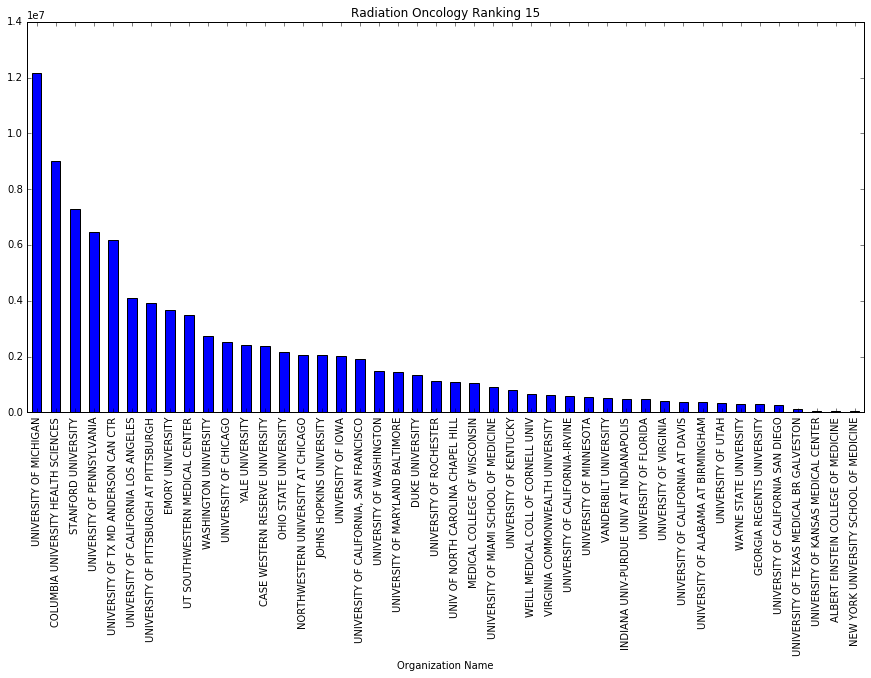

In [22]:
Rad_Onc_plt=radOnc_grp_sum.plot(kind='bar',title='Radiation Oncology Ranking 15',figsize=(15,7))
#Rad_plt.set_ylabel('number of reviewers')

In [335]:
# looking at U of Michigan
PI_uni_dpt_cln[PI_uni_dpt_cln['Organization']=='UNIVERSITY OF MICHIGAN'].sort_values('FY total cost',ascending=False)

,PI,Organization,Department,FY total cost
416,"LAWRENCE, THEODORE S",UNIVERSITY OF MICHIGAN,RADIATION ONCOLOGY,6097616
748,"TEN HAKEN, RANDALL K",UNIVERSITY OF MICHIGAN,RADIATION ONCOLOGY,2755905
646,"ROSS, BRIAN D.",UNIVERSITY OF MICHIGAN,RADIOLOGY,2036592
117,"CHENEVERT, THOMAS L.",UNIVERSITY OF MICHIGAN,RADIOLOGY,704723
802,"WELSH, ROBERT C.",UNIVERSITY OF MICHIGAN,RADIOLOGY,577490
94,"CAO, YUE",UNIVERSITY OF MICHIGAN,RADIATION ONCOLOGY,557819
281,"HADJIYSKI, LUBOMIR M",UNIVERSITY OF MICHIGAN,RADIOLOGY,554150
101,"CHAN, HEANG-PING",UNIVERSITY OF MICHIGAN,RADIOLOGY,550270
647,"ROSS, BRIAN D.",UNIVERSITY OF MICHIGAN,RADIOLOGY,532922
190,"EISBRUCH, AVRAHAM EISBRUCH",UNIVERSITY OF MICHIGAN,RADIATION ONCOLOGY,487590


In [336]:
# NA filled after with values Alma provided  
PI_uni_dpt_cost=pd.read_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_PI_uni_dpt_cost.csv')

In [13]:
Rad15_dpt.columns

Index([u'Project Title', u'Administering  IC', u'Application ID',
       u'Project Number', u'Type', u'Activity', u'IC', u'Serial Number',
       u'Support Year', u'Suffix', u'Contact PI  Person ID',
       u'Contact PI / Project Leader', u'Organization Name', u'FY Total Cost',
       u'Department'],
      dtype='object')

In [6]:
# drop U Michigan support grant
Rad15_dpt[Rad15_dpt['Contact PI / Project Leader']=='LAWRENCE, THEODORE S']

,Project Title,Administering IC,Application ID,Project Number,Type,Activity,IC,Serial Number,Support Year,Suffix,Contact PI Person ID,Contact PI / Project Leader,Organization Name,FY Total Cost,Department
421,UNIVERSITY OF MICHIGAN COMPREHENSIVE CANCER CE...,NCI,9125262,3P30CA046592-27S1,3,P30,CA,46592,27,S1,1863924,"LAWRENCE, THEODORE S",UNIVERSITY OF MICHIGAN,198450,RADIATION ONCOLOGY
422,UNIVERSITY OF MICHIGAN COMPREHENSIVE CANCER CE...,NCI,8896442,5P30CA046592-27,5,P30,CA,46592,27,NaN,1863924,"LAWRENCE, THEODORE S",UNIVERSITY OF MICHIGAN,6097616,RADIATION ONCOLOGY


In [24]:
# drop U Michigan CSSG grant
Rad15_dpt_UMdrp=Rad15_dpt.drop(422)

# verify drop
print Rad15_dpt_UMdrp[420:425]
print '\n', len(Rad15_dpt_UMdrp)
print len(Rad15_dpt)

                                         Project Title Administering  IC  \
420  RAPID MULTIPARAMETRIC ASSESSMENT OF HIP CARTIL...             NIBIB   
421  UNIVERSITY OF MICHIGAN COMPREHENSIVE CANCER CE...               NCI   
423  CHARACTERIZATION AND TARGETING THE GDNF AND OT...             NIDCR   
424  TARGETING GALECTIN-1 WITH RADIATION IN LUNG CA...               NCI   
425  MR-HIFU INDUCED DRUG DELIVERY FOR PANCREATIC C...               NCI   

     Application ID     Project Number  Type Activity  IC  Serial Number  \
420         8868696    1R21EB020096-01     1      R21  EB          20096   
421         9125262  3P30CA046592-27S1     3      P30  CA          46592   
423         8940734    1R01DE025227-01     1      R01  DE          25227   
424         8826697    5R01CA161585-04     5      R01  CA         161585   
425         8874729  1R01CA188654-01A1     1      R01  CA         188654   

     Support Year Suffix  Contact PI  Person ID Contact PI / Project Leader  \
420    

In [25]:
# look at Radiation Oncology department
# group by organizations 
Rad15_dpt_UMdrp_grp=Rad15_dpt_UMdrp[Rad15_dpt_UMdrp['Department']=='RADIATION ONCOLOGY'].groupby(Rad15_dpt_UMdrp['Organization Name'])

# by number of grants 
RadOnc_NumGrant_grp=Rad15_dpt_UMdrp_grp.size().sort_values(ascending=False)
RadOnc_NumGrant_grp

Organization Name
UNIVERSITY OF TX MD ANDERSON CAN CTR        21
STANFORD UNIVERSITY                         15
UNIVERSITY OF PENNSYLVANIA                  15
EMORY UNIVERSITY                            12
UNIVERSITY OF MICHIGAN                      11
UT SOUTHWESTERN MEDICAL CENTER              11
JOHNS HOPKINS UNIVERSITY                     9
WASHINGTON UNIVERSITY                        9
YALE UNIVERSITY                              8
UNIVERSITY OF IOWA                           6
NORTHWESTERN UNIVERSITY AT CHICAGO           6
OHIO STATE UNIVERSITY                        6
UNIVERSITY OF KENTUCKY                       5
UNIVERSITY OF CALIFORNIA, SAN FRANCISCO      5
DUKE UNIVERSITY                              5
COLUMBIA UNIVERSITY HEALTH SCIENCES          5
CASE WESTERN RESERVE UNIVERSITY              5
UNIVERSITY OF CHICAGO                        4
UNIV OF NORTH CAROLINA CHAPEL HILL           4
UNIVERSITY OF CALIFORNIA LOS ANGELES         4
UNIVERSITY OF MARYLAND BALTIMORE          

In [47]:
RadOnc_NumGrant_grp.to_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_RadOnc_NumGrant.csv',encoding='utf-8')

In [ ]:
radOnc_grp1=PI_uni_dpt_cln[PI_uni_dpt_cln['Department']=='RADIATION ONCOLOGY'].groupby(PI_uni_dpt_cln['Organization'])
radOnc_grp.size()

In [26]:
RadOnc_orgSum=Rad15_dpt_UMdrp_grp['FY Total Cost'].agg('sum').sort_values(ascending=False)
RadOnc_orgSum

Organization Name
COLUMBIA UNIVERSITY HEALTH SCIENCES         9009072
STANFORD UNIVERSITY                         7276817
UNIVERSITY OF PENNSYLVANIA                  6474597
UNIVERSITY OF TX MD ANDERSON CAN CTR        6171391
UNIVERSITY OF MICHIGAN                      6065014
UNIVERSITY OF CALIFORNIA LOS ANGELES        4106323
UNIVERSITY OF PITTSBURGH AT PITTSBURGH      3918869
EMORY UNIVERSITY                            3676133
UT SOUTHWESTERN MEDICAL CENTER              3489933
WASHINGTON UNIVERSITY                       2723693
UNIVERSITY OF CHICAGO                       2523178
YALE UNIVERSITY                             2422967
CASE WESTERN RESERVE UNIVERSITY             2392754
OHIO STATE UNIVERSITY                       2144549
NORTHWESTERN UNIVERSITY AT CHICAGO          2062630
JOHNS HOPKINS UNIVERSITY                    2048898
UNIVERSITY OF IOWA                          2016215
UNIVERSITY OF CALIFORNIA, SAN FRANCISCO     1913321
UNIVERSITY OF WASHINGTON                    14

In [27]:
RadOnc_mktshr=RadOnc_orgSum.apply(lambda x: 100*x/float(RadOnc_orgSum.sum()))
#RadOnc_orgSum
RadOnc_mktshr

Organization Name
COLUMBIA UNIVERSITY HEALTH SCIENCES         10.473171
STANFORD UNIVERSITY                          8.459401
UNIVERSITY OF PENNSYLVANIA                   7.526809
UNIVERSITY OF TX MD ANDERSON CAN CTR         7.174327
UNIVERSITY OF MICHIGAN                       7.050663
UNIVERSITY OF CALIFORNIA LOS ANGELES         4.773657
UNIVERSITY OF PITTSBURGH AT PITTSBURGH       4.555739
EMORY UNIVERSITY                             4.273556
UT SOUTHWESTERN MEDICAL CENTER               4.057095
WASHINGTON UNIVERSITY                        3.166331
UNIVERSITY OF CHICAGO                        2.933229
YALE UNIVERSITY                              2.816733
CASE WESTERN RESERVE UNIVERSITY              2.781610
OHIO STATE UNIVERSITY                        2.493068
NORTHWESTERN UNIVERSITY AT CHICAGO           2.397836
JOHNS HOPKINS UNIVERSITY                     2.381872
UNIVERSITY OF IOWA                           2.343878
UNIVERSITY OF CALIFORNIA, SAN FRANCISCO      2.224262
UNIVERSITY

In [28]:
Rad_Onc_rank15=pd.DataFrame(RadOnc_orgSum)
Rad_Onc_rank15['Market Share %']=RadOnc_mktshr
Rad_Onc_rank15

,FY Total Cost,Market Share %
Organization Name,,
COLUMBIA UNIVERSITY HEALTH SCIENCES,9009072,10.473171
STANFORD UNIVERSITY,7276817,8.459401
UNIVERSITY OF PENNSYLVANIA,6474597,7.526809
UNIVERSITY OF TX MD ANDERSON CAN CTR,6171391,7.174327
UNIVERSITY OF MICHIGAN,6065014,7.050663
UNIVERSITY OF CALIFORNIA LOS ANGELES,4106323,4.773657
UNIVERSITY OF PITTSBURGH AT PITTSBURGH,3918869,4.555739
EMORY UNIVERSITY,3676133,4.273556
UT SOUTHWESTERN MEDICAL CENTER,3489933,4.057095


In [29]:
rank=range(1,len(Rad_Onc_rank15)+1)
Rad_Onc_rank15['Rank']=rank
Rad_Onc_rank151=Rad_Onc_rank15.reset_index()
Rad_Onc_rank15

,FY Total Cost,Market Share %,Rank
Organization Name,,,
COLUMBIA UNIVERSITY HEALTH SCIENCES,9009072,10.473171,1
STANFORD UNIVERSITY,7276817,8.459401,2
UNIVERSITY OF PENNSYLVANIA,6474597,7.526809,3
UNIVERSITY OF TX MD ANDERSON CAN CTR,6171391,7.174327,4
UNIVERSITY OF MICHIGAN,6065014,7.050663,5
UNIVERSITY OF CALIFORNIA LOS ANGELES,4106323,4.773657,6
UNIVERSITY OF PITTSBURGH AT PITTSBURGH,3918869,4.555739,7
EMORY UNIVERSITY,3676133,4.273556,8
UT SOUTHWESTERN MEDICAL CENTER,3489933,4.057095,9


In [30]:
#Rad_Onc_rank15.set_index(['Rank',range(1,len(Rad_Onc_rank15))])
#Rad_Onc_rank15['Rank']=[1,(len(Rad_Onc_rank15)+1)]
#Rad_Onc_rank15.shape
#len(range(1,len(Rad_Onc_rank15)))
rank=range(1,len(Rad_Onc_rank15)+1)
Rad_Onc_rank15['Rank']=rank
#Rad_Onc_rank15.set_index(['Rank'])
#Rad_Onc_rank15['Organization Name']=Rad_Onc_rank15.index
#Rad_Onc_rank15=Rad_Onc_rank15.set_index(['Rank'])
#Rad_Onc_rank151=pd.DataFrame(RadOnc_orgSum)
#Rad_Onc_rank15=Rad_Onc_rank15.drop('index',axis=1)
Rad_Onc_rank151=Rad_Onc_rank151.set_index(Rad_Onc_rank151['Rank']).drop('Rank',axis=1)


In [171]:
RadOnc_NumGrant_grp

Organization Name
UNIVERSITY OF TX MD ANDERSON CAN CTR        20
STANFORD UNIVERSITY                         15
UNIVERSITY OF PENNSYLVANIA                  15
EMORY UNIVERSITY                            12
UNIVERSITY OF MICHIGAN                      11
UT SOUTHWESTERN MEDICAL CENTER              11
JOHNS HOPKINS UNIVERSITY                     9
WASHINGTON UNIVERSITY                        9
YALE UNIVERSITY                              8
UNIVERSITY OF IOWA                           6
NORTHWESTERN UNIVERSITY AT CHICAGO           6
OHIO STATE UNIVERSITY                        6
UNIVERSITY OF KENTUCKY                       5
UNIVERSITY OF CALIFORNIA, SAN FRANCISCO      5
DUKE UNIVERSITY                              5
COLUMBIA UNIVERSITY HEALTH SCIENCES          5
CASE WESTERN RESERVE UNIVERSITY              5
UNIVERSITY OF CHICAGO                        4
UNIV OF NORTH CAROLINA CHAPEL HILL           4
UNIVERSITY OF CALIFORNIA LOS ANGELES         4
UNIVERSITY OF MARYLAND BALTIMORE          

In [31]:
RadOnc_NumGrant_df=RadOnc_NumGrant_grp.to_frame('Number of grants').reset_index()
RadOnc_NumGrant_df

,Organization Name,Number of grants
0,UNIVERSITY OF TX MD ANDERSON CAN CTR,21
1,STANFORD UNIVERSITY,15
2,UNIVERSITY OF PENNSYLVANIA,15
3,EMORY UNIVERSITY,12
4,UNIVERSITY OF MICHIGAN,11
5,UT SOUTHWESTERN MEDICAL CENTER,11
6,JOHNS HOPKINS UNIVERSITY,9
7,WASHINGTON UNIVERSITY,9
8,YALE UNIVERSITY,8
9,UNIVERSITY OF IOWA,6


In [32]:
Rad_Onc_rank151['Number of grants']=RadOnc_NumGrant_df['Number of grants']
Rad_Onc_rank151=Rad_Onc_rank151.drop('Number of grants',axis=1)

In [33]:
Rad_Onc_rank151=pd.merge(Rad_Onc_rank151,RadOnc_NumGrant_df,how='left',on='Organization Name')
Rad_Onc_rank151

,Organization Name,FY Total Cost,Market Share %,Number of grants
0,COLUMBIA UNIVERSITY HEALTH SCIENCES,9009072,10.473171,5
1,STANFORD UNIVERSITY,7276817,8.459401,15
2,UNIVERSITY OF PENNSYLVANIA,6474597,7.526809,15
3,UNIVERSITY OF TX MD ANDERSON CAN CTR,6171391,7.174327,21
4,UNIVERSITY OF MICHIGAN,6065014,7.050663,11
5,UNIVERSITY OF CALIFORNIA LOS ANGELES,4106323,4.773657,4
6,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,3918869,4.555739,2
7,EMORY UNIVERSITY,3676133,4.273556,12
8,UT SOUTHWESTERN MEDICAL CENTER,3489933,4.057095,11
9,WASHINGTON UNIVERSITY,2723693,3.166331,9


In [205]:
Rad_Onc_rank151=pd.read_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_final.csv')
Rad_Onc_rank151

,Rank,Organization Name,FY Total Cost,Market Share %,Number of grants
0,1,COLUMBIA UNIVERSITY HEALTH SCIENCES,9009072,10.505765,5
1,2,STANFORD UNIVERSITY,7276817,8.485727,15
2,3,UNIVERSITY OF PENNSYLVANIA,6474597,7.550233,15
3,4,UNIVERSITY OF MICHIGAN,6065014,7.072605,11
4,5,UNIVERSITY OF TX MD ANDERSON CAN CTR,5904516,6.885443,20
5,6,UNIVERSITY OF CALIFORNIA LOS ANGELES,4106323,4.788513,4
6,7,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,3918869,4.569917,2
7,8,EMORY UNIVERSITY,3676133,4.286855,12
8,9,UT SOUTHWESTERN MEDICAL CENTER,3489933,4.069722,11
9,10,WASHINGTON UNIVERSITY,2723693,3.176185,9


In [38]:
Rad_Onc_rank151=Rad_Onc_rank151.set_index(Rad_Onc_rank151['Rank']).drop('Rank',axis=1)

In [37]:
rank=range(1,len(Rad_Onc_rank15)+1)
Rad_Onc_rank151['Rank']=rank
Rad_Onc_rank151

,Organization Name,FY Total Cost $,Market Share %,Number of grants,Rank
0,COLUMBIA UNIVERSITY HEALTH SCIENCES,9009072,10.473171,5,1
1,STANFORD UNIVERSITY,7276817,8.459401,15,2
2,UNIVERSITY OF PENNSYLVANIA,6474597,7.526809,15,3
3,UNIVERSITY OF TX MD ANDERSON CAN CTR,6171391,7.174327,21,4
4,UNIVERSITY OF MICHIGAN,6065014,7.050663,11,5
5,UNIVERSITY OF CALIFORNIA LOS ANGELES,4106323,4.773657,4,6
6,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,3918869,4.555739,2,7
7,EMORY UNIVERSITY,3676133,4.273556,12,8
8,UT SOUTHWESTERN MEDICAL CENTER,3489933,4.057095,11,9
9,WASHINGTON UNIVERSITY,2723693,3.166331,9,10


In [39]:
Rad_Onc_rank151.rename(columns={'FY Total Cost':'FY Total Cost $'}, inplace=True)
Rad_Onc_rank151

,Organization Name,FY Total Cost $,Market Share %,Number of grants
Rank,,,,
1,COLUMBIA UNIVERSITY HEALTH SCIENCES,9009072,10.473171,5
2,STANFORD UNIVERSITY,7276817,8.459401,15
3,UNIVERSITY OF PENNSYLVANIA,6474597,7.526809,15
4,UNIVERSITY OF TX MD ANDERSON CAN CTR,6171391,7.174327,21
5,UNIVERSITY OF MICHIGAN,6065014,7.050663,11
6,UNIVERSITY OF CALIFORNIA LOS ANGELES,4106323,4.773657,4
7,UNIVERSITY OF PITTSBURGH AT PITTSBURGH,3918869,4.555739,2
8,EMORY UNIVERSITY,3676133,4.273556,12
9,UT SOUTHWESTERN MEDICAL CENTER,3489933,4.057095,11


In [42]:
Rad_Onc_rank151.to_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_final_update.csv',encoding='utf-8')

In [44]:
RadOnc_orgSum.to_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_RadOnc_totalCost.csv',encoding='utf-8')

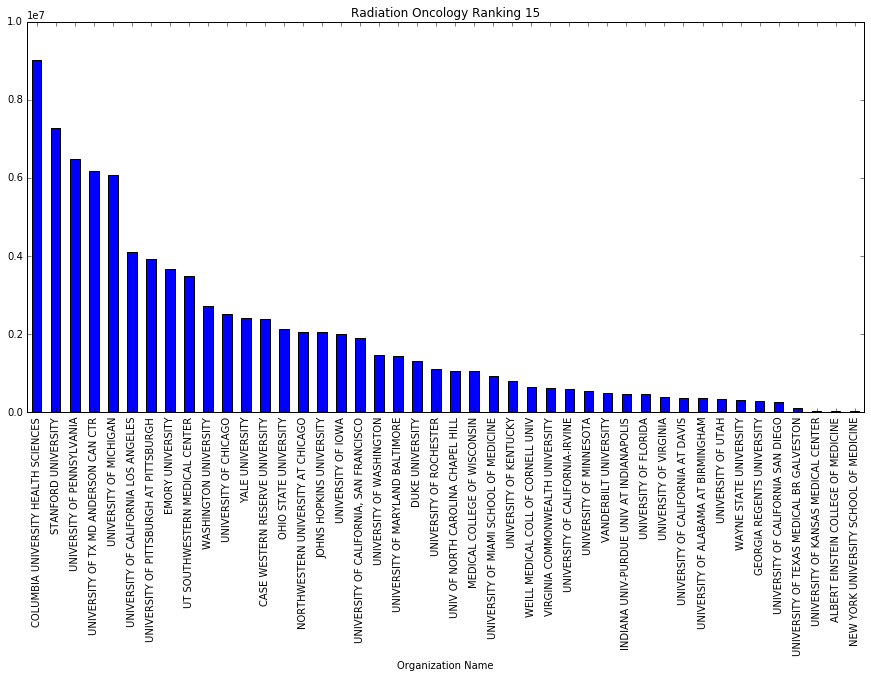

In [41]:
Rad_Onc_plt1=RadOnc_orgSum.plot(kind='bar',title='Radiation Oncology Ranking 15',figsize=(15,7))

In [49]:
# look at Radiology department
# group by organizations 
Rad15_dpt_UMdrp_Radgrp=Rad15_dpt_UMdrp[Rad15_dpt_UMdrp['Department']=='RADIOLOGY'].groupby(Rad15_dpt_UMdrp['Organization Name'])

# by number of grants 
Rad_NumGrant_grp=Rad15_dpt_UMdrp_Radgrp.size().sort_values(ascending=False)
Rad_NumGrant_grp

Organization Name
STANFORD UNIVERSITY                         52
JOHNS HOPKINS UNIVERSITY                    46
UNIVERSITY OF CALIFORNIA, SAN FRANCISCO     36
UNIVERSITY OF PENNSYLVANIA                  34
WASHINGTON UNIVERSITY                       31
VANDERBILT UNIVERSITY                       28
NEW YORK UNIVERSITY SCHOOL OF MEDICINE      23
YALE UNIVERSITY                             20
UNIVERSITY OF CALIFORNIA SAN DIEGO          19
DUKE UNIVERSITY                             17
UNIVERSITY OF MICHIGAN                      17
UNIVERSITY OF PITTSBURGH AT PITTSBURGH      16
UNIVERSITY OF WASHINGTON                    15
UNIVERSITY OF MINNESOTA                     15
UNIVERSITY OF CALIFORNIA LOS ANGELES        13
UNIVERSITY OF UTAH                          13
EMORY UNIVERSITY                            12
WEILL MEDICAL COLL OF CORNELL UNIV          12
UNIV OF NORTH CAROLINA CHAPEL HILL          11
UNIVERSITY OF CHICAGO                       11
COLUMBIA UNIVERSITY HEALTH SCIENCES       

In [50]:
Rad_NumGrant_grp.to_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_Rad_NumGrant.csv',encoding='utf-8')

In [51]:
Rad_totalCost_grp=Rad15_dpt_UMdrp_Radgrp['FY Total Cost'].agg('sum').sort_values(ascending=False)
Rad_totalCost_grp

Organization Name
STANFORD UNIVERSITY                         22230738
JOHNS HOPKINS UNIVERSITY                    17802904
UNIVERSITY OF CALIFORNIA, SAN FRANCISCO     17235623
UNIVERSITY OF PENNSYLVANIA                  16308039
WASHINGTON UNIVERSITY                       14737589
UNIVERSITY OF CALIFORNIA LOS ANGELES         9475102
NEW YORK UNIVERSITY SCHOOL OF MEDICINE       9287558
YALE UNIVERSITY                              8709056
UNIVERSITY OF MICHIGAN                       8471846
UNIVERSITY OF WASHINGTON                     8377844
UNIVERSITY OF CALIFORNIA SAN DIEGO           8332639
VANDERBILT UNIVERSITY                        7017533
UNIVERSITY OF IOWA                           6637449
UNIVERSITY OF MINNESOTA                      6154070
DUKE UNIVERSITY                              5714802
WEILL MEDICAL COLL OF CORNELL UNIV           5449431
UNIVERSITY OF PITTSBURGH AT PITTSBURGH       5285439
UNIVERSITY OF UTAH                           5096392
COLUMBIA UNIVERSITY HEALTH S

In [52]:
Rad_totalCost_grp.to_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_Rad_totalCost.csv',encoding='utf-8')

In [46]:
# Radiology department analysis

full_df=pd.read_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_dpt.csv')
full_df

,Project Title,Administering IC,Application ID,Project Number,Type,Activity,IC,Serial Number,Support Year,Suffix,Contact PI Person ID,Contact PI / Project Leader,Organization Name,FY Total Cost,Department
0,QUANTITATIVE MRI FOR PREDICTING RESPONSE OF BR...,NCI,8887540,2U01CA142565-06,2,U01,CA,142565,6,NaN,11184125,"ABRAMSON, RICHARD G",VANDERBILT UNIVERSITY,169657,RADIOLOGY
1,WU-MDACC INTER-INSTITUTIONAL MOLECULAR IMAGING...,NCI,8820886,5P50CA094056-15,5,P50,CA,94056,15,NaN,7034760,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,1428925,RADIOLOGY
2,NANOPHOTOSENSITIZERS FOR REGENERATIVE PHOTOTHE...,NIBIB,8977000,1R01EB021048-01,1,R01,EB,21048,1,NaN,7034760,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,474615,RADIOLOGY
3,CENTER FOR MULTIPLE MYELOMA NANOTHERAPY,NCI,8962044,1U54CA199092-01,1,U54,CA,199092,1,NaN,7034760,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,2256089,RADIOLOGY
4,DEVELOPMENT OF GOGGLE SYSTEM FOR FLUORESCENCE ...,NCI,8787992,5R01CA171651-03,5,R01,CA,171651,3,NaN,7034760,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,603662,RADIOLOGY
5,FLUORESCENCE MOLECULAR TOMOGRAPHY SYSTEM,OD,8826437,1S10OD020129-01,1,S10,OD,20129,1,NaN,7034760,"ACHILEFU, SAMUEL",WASHINGTON UNIVERSITY,330122,RADIOLOGY
6,MULTI-RESOLUTION THREE DIMENSIONAL STEREOTAXIC...,NIBIB,8866401,5R03EB017806-02,5,R03,EB,17806,2,NaN,11268254,"AGGARWAL, MANISHA",JOHNS HOPKINS UNIVERSITY,81000,RADIOLOGY
7,INTRACELLULAR OXYGEN SENSING USING 19F MRI,NIBIB,8919703,5R01EB017271-03,5,R01,EB,17271,3,NaN,1970914,"AHRENS, ERIC T",UNIVERSITY OF CALIFORNIA SAN DIEGO,330035,RADIOLOGY
8,IEEE MEDICAL IMAGING CONFERENCE,NIBIB,8910150,1R13EB020487-01,1,R13,EB,20487,1,NaN,8540275,"ALESSIO, ADAM M",UNIVERSITY OF WASHINGTON,10000,RADIOLOGY
9,LOW-DOSE MYOCARDIAL PERFUSION IMAGING BY CT,NHLBI,8837053,5R01HL109327-04,5,R01,HL,109327,4,NaN,8540275,"ALESSIO, ADAM M",UNIVERSITY OF WASHINGTON,408661,RADIOLOGY


In [52]:
Rad_grp=Rad15_dpt[Rad15_dpt['Department']=='RADIOLOGY'].groupby(full_df['Organization Name'])

# by number of grants 
Rad_NumGrant_grp=Rad_grp.size().sort_values(ascending=False)
Rad_NumGrant_grp

Organization Name
STANFORD UNIVERSITY                         52
JOHNS HOPKINS UNIVERSITY                    46
UNIVERSITY OF CALIFORNIA, SAN FRANCISCO     36
UNIVERSITY OF PENNSYLVANIA                  34
WASHINGTON UNIVERSITY                       31
VANDERBILT UNIVERSITY                       28
NEW YORK UNIVERSITY SCHOOL OF MEDICINE      23
YALE UNIVERSITY                             20
UNIVERSITY OF CALIFORNIA SAN DIEGO          19
DUKE UNIVERSITY                             17
UNIVERSITY OF MICHIGAN                      17
UNIVERSITY OF PITTSBURGH AT PITTSBURGH      16
UNIVERSITY OF WASHINGTON                    15
UNIVERSITY OF MINNESOTA                     15
UNIVERSITY OF CALIFORNIA LOS ANGELES        13
UNIVERSITY OF UTAH                          13
EMORY UNIVERSITY                            12
WEILL MEDICAL COLL OF CORNELL UNIV          12
UNIV OF NORTH CAROLINA CHAPEL HILL          11
UNIVERSITY OF CHICAGO                       11
COLUMBIA UNIVERSITY HEALTH SCIENCES       

In [53]:
Rad_orgSum=Rad_grp['FY Total Cost'].agg('sum').sort_values(ascending=False)
Rad_orgSum

Organization Name
STANFORD UNIVERSITY                         22230738
JOHNS HOPKINS UNIVERSITY                    17802904
UNIVERSITY OF CALIFORNIA, SAN FRANCISCO     17235623
UNIVERSITY OF PENNSYLVANIA                  16308039
WASHINGTON UNIVERSITY                       14737589
UNIVERSITY OF CALIFORNIA LOS ANGELES         9475102
NEW YORK UNIVERSITY SCHOOL OF MEDICINE       9287558
YALE UNIVERSITY                              8709056
UNIVERSITY OF MICHIGAN                       8471846
UNIVERSITY OF WASHINGTON                     8377844
UNIVERSITY OF CALIFORNIA SAN DIEGO           8332639
VANDERBILT UNIVERSITY                        7017533
UNIVERSITY OF IOWA                           6637449
UNIVERSITY OF MINNESOTA                      6154070
DUKE UNIVERSITY                              5714802
WEILL MEDICAL COLL OF CORNELL UNIV           5449431
UNIVERSITY OF PITTSBURGH AT PITTSBURGH       5285439
UNIVERSITY OF UTAH                           5096392
COLUMBIA UNIVERSITY HEALTH S

In [54]:
full_df.columns=full_df.columns.str.strip()

In [55]:
Rad_mktshr=Rad_orgSum.apply(lambda x: 100*x/float(Rad_orgSum.sum()))
Rad_mktshr

Organization Name
STANFORD UNIVERSITY                         9.009258
JOHNS HOPKINS UNIVERSITY                    7.214828
UNIVERSITY OF CALIFORNIA, SAN FRANCISCO     6.984931
UNIVERSITY OF PENNSYLVANIA                  6.609017
WASHINGTON UNIVERSITY                       5.972574
UNIVERSITY OF CALIFORNIA LOS ANGELES        3.839892
NEW YORK UNIVERSITY SCHOOL OF MEDICINE      3.763888
YALE UNIVERSITY                             3.529443
UNIVERSITY OF MICHIGAN                      3.433311
UNIVERSITY OF WASHINGTON                    3.395216
UNIVERSITY OF CALIFORNIA SAN DIEGO          3.376896
VANDERBILT UNIVERSITY                       2.843935
UNIVERSITY OF IOWA                          2.689901
UNIVERSITY OF MINNESOTA                     2.494006
DUKE UNIVERSITY                             2.315988
WEILL MEDICAL COLL OF CORNELL UNIV          2.208443
UNIVERSITY OF PITTSBURGH AT PITTSBURGH      2.141984
UNIVERSITY OF UTAH                          2.065370
COLUMBIA UNIVERSITY HEALTH S

In [56]:
Rad_rank15=pd.DataFrame(Rad_orgSum)
Rad_rank15['Market Share %']=Rad_mktshr
Rad_rank15

,FY Total Cost,Market Share %
Organization Name,,
STANFORD UNIVERSITY,22230738,9.009258
JOHNS HOPKINS UNIVERSITY,17802904,7.214828
"UNIVERSITY OF CALIFORNIA, SAN FRANCISCO",17235623,6.984931
UNIVERSITY OF PENNSYLVANIA,16308039,6.609017
WASHINGTON UNIVERSITY,14737589,5.972574
UNIVERSITY OF CALIFORNIA LOS ANGELES,9475102,3.839892
NEW YORK UNIVERSITY SCHOOL OF MEDICINE,9287558,3.763888
YALE UNIVERSITY,8709056,3.529443
UNIVERSITY OF MICHIGAN,8471846,3.433311


In [57]:
rank=range(1,len(Rad_rank15)+1)
Rad_rank15['Rank']=rank
Rad_rank15=Rad_rank15.reset_index()
Rad_rank15

,Organization Name,FY Total Cost,Market Share %,Rank
0,STANFORD UNIVERSITY,22230738,9.009258,1
1,JOHNS HOPKINS UNIVERSITY,17802904,7.214828,2
2,"UNIVERSITY OF CALIFORNIA, SAN FRANCISCO",17235623,6.984931,3
3,UNIVERSITY OF PENNSYLVANIA,16308039,6.609017,4
4,WASHINGTON UNIVERSITY,14737589,5.972574,5
5,UNIVERSITY OF CALIFORNIA LOS ANGELES,9475102,3.839892,6
6,NEW YORK UNIVERSITY SCHOOL OF MEDICINE,9287558,3.763888,7
7,YALE UNIVERSITY,8709056,3.529443,8
8,UNIVERSITY OF MICHIGAN,8471846,3.433311,9
9,UNIVERSITY OF WASHINGTON,8377844,3.395216,10


In [58]:
Rad_NumGrant_df=Rad_NumGrant_grp.to_frame('Number of grants').reset_index()
Rad_NumGrant_df

,Organization Name,Number of grants
0,STANFORD UNIVERSITY,52
1,JOHNS HOPKINS UNIVERSITY,46
2,"UNIVERSITY OF CALIFORNIA, SAN FRANCISCO",36
3,UNIVERSITY OF PENNSYLVANIA,34
4,WASHINGTON UNIVERSITY,31
5,VANDERBILT UNIVERSITY,28
6,NEW YORK UNIVERSITY SCHOOL OF MEDICINE,23
7,YALE UNIVERSITY,20
8,UNIVERSITY OF CALIFORNIA SAN DIEGO,19
9,DUKE UNIVERSITY,17


In [59]:
Rad_rank151=pd.merge(Rad_rank15,Rad_NumGrant_df,how='left',on='Organization Name')
Rad_rank151

,Organization Name,FY Total Cost,Market Share %,Rank,Number of grants
0,STANFORD UNIVERSITY,22230738,9.009258,1,52
1,JOHNS HOPKINS UNIVERSITY,17802904,7.214828,2,46
2,"UNIVERSITY OF CALIFORNIA, SAN FRANCISCO",17235623,6.984931,3,36
3,UNIVERSITY OF PENNSYLVANIA,16308039,6.609017,4,34
4,WASHINGTON UNIVERSITY,14737589,5.972574,5,31
5,UNIVERSITY OF CALIFORNIA LOS ANGELES,9475102,3.839892,6,13
6,NEW YORK UNIVERSITY SCHOOL OF MEDICINE,9287558,3.763888,7,23
7,YALE UNIVERSITY,8709056,3.529443,8,20
8,UNIVERSITY OF MICHIGAN,8471846,3.433311,9,17
9,UNIVERSITY OF WASHINGTON,8377844,3.395216,10,15


In [60]:
Rad_rank151=Rad_rank151.set_index(Rad_rank151['Rank']).drop('Rank',axis=1)

In [24]:
Rad_rank151.rename(columns={'FY Total Cost':'FY Total Cost $'}, inplace=True)
Rad_rank151

,Organization Name,FY Total Cost $,Market Share %,Number of grants
Rank,,,,
1,STANFORD UNIVERSITY,22230738,8.999524,52
2,JOHNS HOPKINS UNIVERSITY,17802904,7.207033,46
3,"UNIVERSITY OF CALIFORNIA, SAN FRANCISCO",17235623,6.977385,36
4,UNIVERSITY OF PENNSYLVANIA,16308039,6.601877,34
5,WASHINGTON UNIVERSITY,14737589,5.966122,31
6,UNIVERSITY OF CALIFORNIA LOS ANGELES,9475102,3.835744,13
7,NEW YORK UNIVERSITY SCHOOL OF MEDICINE,9287558,3.759821,23
8,YALE UNIVERSITY,8709056,3.525630,20
9,UNIVERSITY OF MICHIGAN,8471846,3.429602,17


In [61]:
Rad_rank151.to_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\Rad_rank15_update.csv',encoding='utf-8')

In [10]:
Rad15_dpt.columns

Index([u'Project Title', u'Administering  IC', u'Application ID',
       u'Project Number', u'Type', u'Activity', u'IC', u'Serial Number',
       u'Support Year', u'Suffix', u'Contact PI  Person ID',
       u'Contact PI / Project Leader', u'Organization Name', u'FY Total Cost ',
       u'Department'],
      dtype='object')

In [11]:
Rad15_dpt[(Rad15_dpt['Department']=='RADIOLOGY')&(Rad15_dpt['Organization Name']=='UNIVERSITY OF TX MD ANDERSON CAN CTR')]

,Project Title,Administering IC,Application ID,Project Number,Type,Activity,IC,Serial Number,Support Year,Suffix,Contact PI Person ID,Contact PI / Project Leader,Organization Name,FY Total Cost,Department


In [12]:
 Rad15_dpt[Rad15_dpt['Organization Name']=='UNIVERSITY OF TX MD ANDERSON CAN CTR']

,Project Title,Administering IC,Application ID,Project Number,Type,Activity,IC,Serial Number,Support Year,Suffix,Contact PI Person ID,Contact PI / Project Leader,Organization Name,FY Total Cost,Department
44,REAL-TIME VOLUMETRIC SCINTILLATION DOSIMETRY F...,NCI,8895288,5R01CA182450-02,5,R01,CA,182450,2,NaN,8293922,"BEDDAR, SAM",UNIVERSITY OF TX MD ANDERSON CAN CTR,266875,RADIATION PHYSICS
51,(PQC5)EARLY DETECTION PANCREATIC CANCER BY HYP...,NCI,8841697,5R21CA185536-02,5,R21,CA,185536,2,NaN,11758537,"BHATTACHARYA, PRATIP K.",UNIVERSITY OF TX MD ANDERSON CAN CTR,174000,CANCER SYSTEMS IMAGING - FACULTY
111,STUDY THE ROLE OF DNA DAMAGE RESPONSES IN TUMO...,NCI,8838722,5R01CA092312-17,5,R01,CA,92312,17,NaN,1980054,"CHEN, JUNJIE",UNIVERSITY OF TX MD ANDERSON CAN CTR,236801,EXPERIMENTAL RADIATION ONCOLOGY
112,ANALYSIS OF BRCA1 FUNCTION IN DNA REPAIR,NCI,8838721,5R01CA089239-17,5,R01,CA,89239,17,NaN,1980054,"CHEN, JUNJIE",UNIVERSITY OF TX MD ANDERSON CAN CTR,251836,EXPERIMENTAL RADIATION ONCOLOGY
113,FANCONI ANEMIA PATHWAY IN DNA DAMAGE REPAIR,NCI,8826053,5R01CA157448-04,5,R01,CA,157448,4,NaN,1980054,"CHEN, JUNJIE",UNIVERSITY OF TX MD ANDERSON CAN CTR,327850,EXPERIMENTAL RADIATION ONCOLOGY
114,STUDY THE ROLE OF CHFR IN TUMORIGENESIS,NCI,8774203,5R01CA113381-11,5,R01,CA,113381,11,NaN,1980054,"CHEN, JUNJIE",UNIVERSITY OF TX MD ANDERSON CAN CTR,272318,EXPERIMENTAL RADIATION ONCOLOGY
163,ELUCIDATE THE ROLE OF MIR-141 IN BRAIN METASTA...,NCI,8887321,5R21CA188672-02,5,R21,CA,188672,2,NaN,9807091,"DEBEB, BISRAT G",UNIVERSITY OF TX MD ANDERSON CAN CTR,174000,RADIATION
234,MECHANISTIC STUDIES OF CANCER CELL ADAPTIVE RE...,NCI,8797726,1R01CA190370-01,1,R01,CA,190370,1,NaN,9939858,"GAN, BOYI",UNIVERSITY OF TX MD ANDERSON CAN CTR,366000,�EXPERIMENTAL RADIATION ONCOLOGY
235,STUDYING METABOLIC STRESS SIGNALING IN RENAL C...,NCI,8851540,5R01CA181196-02,5,R01,CA,181196,2,NaN,9939858,"GAN, BOYI",UNIVERSITY OF TX MD ANDERSON CAN CTR,332000,�EXPERIMENTAL RADIATION ONCOLOGY
267,TARGETING THE DNA REPAIR PATHWAY CHOICE IN BRE...,NCI,8951666,1R21CA192052-01A1,1,R21,CA,192052,1,A1,11412695,"GONG, ZIHUA",UNIVERSITY OF TX MD ANDERSON CAN CTR,208800,EXPERIMENTAL RADIATION ONCOLOGY


In [64]:
full_df[full_df['Organization Name']=='UNIVERSITY OF TX MD ANDERSON CAN CTR']

,Project Title,Administering IC,Application ID,Project Number,Type,Activity,IC,Serial Number,Support Year,Suffix,Contact PI Person ID,Contact PI / Project Leader,Organization Name,FY Total Cost,Department
44,REAL-TIME VOLUMETRIC SCINTILLATION DOSIMETRY F...,NCI,8895288,5R01CA182450-02,5,R01,CA,182450,2,NaN,8293922,"BEDDAR, SAM",UNIVERSITY OF TX MD ANDERSON CAN CTR,266875,RADIATION PHYSICS
51,(PQC5)EARLY DETECTION PANCREATIC CANCER BY HYP...,NCI,8841697,5R21CA185536-02,5,R21,CA,185536,2,NaN,11758537,"BHATTACHARYA, PRATIP K.",UNIVERSITY OF TX MD ANDERSON CAN CTR,174000,CANCER SYSTEMS IMAGING - FACULTY
111,STUDY THE ROLE OF DNA DAMAGE RESPONSES IN TUMO...,NCI,8838722,5R01CA092312-17,5,R01,CA,92312,17,NaN,1980054,"CHEN, JUNJIE",UNIVERSITY OF TX MD ANDERSON CAN CTR,236801,EXPERIMENTAL RADIATION ONCOLOGY
112,ANALYSIS OF BRCA1 FUNCTION IN DNA REPAIR,NCI,8838721,5R01CA089239-17,5,R01,CA,89239,17,NaN,1980054,"CHEN, JUNJIE",UNIVERSITY OF TX MD ANDERSON CAN CTR,251836,EXPERIMENTAL RADIATION ONCOLOGY
113,FANCONI ANEMIA PATHWAY IN DNA DAMAGE REPAIR,NCI,8826053,5R01CA157448-04,5,R01,CA,157448,4,NaN,1980054,"CHEN, JUNJIE",UNIVERSITY OF TX MD ANDERSON CAN CTR,327850,EXPERIMENTAL RADIATION ONCOLOGY
114,STUDY THE ROLE OF CHFR IN TUMORIGENESIS,NCI,8774203,5R01CA113381-11,5,R01,CA,113381,11,NaN,1980054,"CHEN, JUNJIE",UNIVERSITY OF TX MD ANDERSON CAN CTR,272318,EXPERIMENTAL RADIATION ONCOLOGY
163,ELUCIDATE THE ROLE OF MIR-141 IN BRAIN METASTA...,NCI,8887321,5R21CA188672-02,5,R21,CA,188672,2,NaN,9807091,"DEBEB, BISRAT G",UNIVERSITY OF TX MD ANDERSON CAN CTR,174000,RADIATION
234,MECHANISTIC STUDIES OF CANCER CELL ADAPTIVE RE...,NCI,8797726,1R01CA190370-01,1,R01,CA,190370,1,NaN,9939858,"GAN, BOYI",UNIVERSITY OF TX MD ANDERSON CAN CTR,366000,�EXPERIMENTAL RADIATION ONCOLOGY
235,STUDYING METABOLIC STRESS SIGNALING IN RENAL C...,NCI,8851540,5R01CA181196-02,5,R01,CA,181196,2,NaN,9939858,"GAN, BOYI",UNIVERSITY OF TX MD ANDERSON CAN CTR,332000,�EXPERIMENTAL RADIATION ONCOLOGY
267,TARGETING THE DNA REPAIR PATHWAY CHOICE IN BRE...,NCI,8951666,1R21CA192052-01A1,1,R21,CA,192052,1,A1,11412695,"GONG, ZIHUA",UNIVERSITY OF TX MD ANDERSON CAN CTR,208800,EXPERIMENTAL RADIATION ONCOLOGY


In [13]:
Rad15_final_df=pd.read_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\rank15_dpt_cln.csv')

In [14]:
Rad15_final_df[(Rad15_final_df['Department']=='RADIOLOGY')&(Rad15_final_df['Organization Name']=='UNIVERSITY OF TX MD ANDERSON CAN CTR')]

,Project Title,Administering IC,Application ID,Project Number,Type,Activity,IC,Serial Number,Support Year,Suffix,Contact PI Person ID,Contact PI / Project Leader,Organization Name,FY Total Cost,Department
51,(PQC5)EARLY DETECTION PANCREATIC CANCER BY HYP...,NCI,8841697,5R21CA185536-02,5,R21,CA,185536,2,NaN,11758537,"BHATTACHARYA, PRATIP K.",UNIVERSITY OF TX MD ANDERSON CAN CTR,174000,RADIOLOGY
302,ADVANCED MICRO-PET/CT/RT SYSTEM FOR TRANSLATIO...,NIBIB,8962231,1R01EB019438-01A1,1,R01,EB,19438,1,A1,3158392,"HAZLE, JOHN D.",UNIVERSITY OF TX MD ANDERSON CAN CTR,360000,RADIOLOGY
395,NOVEL PROBES FOR NEAR-INFRARED FLUORESCENCE IM...,NIBIB,8868658,1R03EB020090-01,1,R03,EB,20090,1,NaN,6576361,"KRASNYKH, VICTOR",UNIVERSITY OF TX MD ANDERSON CAN CTR,80000,RADIOLOGY
396,NEW GENERATION OF RADIOTRACERS FOR PET IMAGING...,NCI,8907973,5R21CA185714-02,5,R21,CA,185714,2,NaN,6576361,"KRASNYKH, VICTOR",UNIVERSITY OF TX MD ANDERSON CAN CTR,174000,RADIOLOGY
404,PERSONALIZING NANOPARTICLE THERAPY,NCI,8824490,5R01CA159042-05,5,R01,CA,159042,5,NaN,1925054,"KUNDRA, VIKAS",UNIVERSITY OF TX MD ANDERSON CAN CTR,324113,RADIOLOGY
726,ITHERA MEDICAL MULTISPECTRAL OPTOACOUSTIC TOMO...,OD,8825823,1S10OD019946-01,1,S10,OD,19946,1,NaN,6647553,"SOKOLOV, KONSTANTIN V",UNIVERSITY OF TX MD ANDERSON CAN CTR,501855,RADIOLOGY
727,INTERDISCIPLINARY TRANSLATIONAL PRE/POSTDOCTOR...,NCI,8932378,1T32CA196561-01,1,T32,CA,196561,1,NaN,6647553,"SOKOLOV, KONSTANTIN V",UNIVERSITY OF TX MD ANDERSON CAN CTR,230983,RADIOLOGY


In [15]:
Rad15_MDA=Rad15_final_df[(Rad15_final_df['Department']=='RADIOLOGY')&(Rad15_final_df['Organization Name']=='UNIVERSITY OF TX MD ANDERSON CAN CTR')]
Rad15_MDA.to_csv('C:\\Users\\atuerxun\\Desktop\\MDA-work\\NIH Rad_Onc\\Rad15_MDA.csv',encoding='utf-8',index=False)